# Experimenting with Causal discovery algorithms (draft)

- toc: true
- branch: master
- badges: true
- comments: false
- author: Tassilo Neubauer
- categories: [causality]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
import requests

%matplotlib inline

/home/tassilo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip install causal-learn

In [3]:
import pip
pip.main(['install','causal-learn'])

/home/tassilo/.local/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Requirement already satisfied: causal-learn in /home/tassilo/.local/lib/python3.10/site-packages (0.1.3.3)

Requirement already satisfied: networkx in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (3.0)

Requirement already satisfied: matplotlib in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (3.5.2)

Requirement already satisfied: scikit-learn in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.2.2)

Requirement already satisfied: graphviz in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (0.20.1)

Requirement already satisfied: numpy in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.23.1)

Requirement already satisfied: statsmodels in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (0.13.5)

Requirement already satisfied: pandas in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.5.0)

Requirement already satisfied: scipy in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.10.0)

Requirement already satisfied: pydot in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (1.4.2)

Requirement already satisfied: tqdm in /home/tassilo/.local/lib/python3.10/site-packages (from causal-learn) (4.65.0)

Requirement already satisfied: packaging>=20.0 in /usr/lib/python3/dist-packages (from matplotlib->causal-learn) (21.3)

Requirement already satisfied: pillow>=6.2.0 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (9.2.0)

Requirement already satisfied: python-dateutil>=2.7 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (2.8.2)

Requirement already satisfied: fonttools>=4.22.0 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (4.34.4)

Requirement already satisfied: pyparsing>=2.2.1 in /usr/lib/python3/dist-packages (from matplotlib->causal-learn) (2.4.7)

Requirement already satisfied: cycler>=0.10 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (0.11.0)

Requirement already satisfied: kiwisolver>=1.0.1 in /home/tassilo/.local/lib/python3.10/site-packages (from matplotlib->causal-learn) (1.4.4)

Requirement already satisfied: pytz>=2020.1 in /usr/lib/python3/dist-packages (from pandas->causal-learn) (2022.1)

Requirement already satisfied: threadpoolctl>=2.0.0 in /home/tassilo/.local/lib/python3.10/site-packages (from scikit-learn->causal-learn) (3.1.0)

Requirement already satisfied: joblib>=1.1.1 in /home/tassilo/.local/lib/python3.10/site-packages (from scikit-learn->causal-learn) (1.2.0)

Requirement already satisfied: patsy>=0.5.2 in /home/tassilo/.local/lib/python3.10/site-packages (from statsmodels->causal-learn) (0.5.3)

Requirement already satisfied: six in /usr/lib/python3/dist-packages (from patsy>=0.5.2->statsmodels->causal-learn) (1.16.0)

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

0

In [7]:
def get_dataset(url):
    response = requests.get(url)
    df = pd.read_csv(url, header=None)
    return df

In [8]:
df = pd.read_csv("Absenteeism_at_work.csv", delimiter=";")

In [12]:
def churn_dataset(df, pValue=0.01):
    # take in dfset url from uci or similar
    # take in url of the dfset?
    # remove columns that are non-numeric
    # remove all instances that contain nan
    # move to numpy
    # run pc on churned df
    include = ['number','bool']
    on_included_cols = list(df.select_dtypes(exclude=include).columns)
    df = df.select_dtypes(include= include)
    d = df.dropna().to_numpy()
    print(type(df))
    # run pc algo:
    var_names = [x for x in list(df.columns) if not x in non_included_cols]
    cg = pc(data,pValue,node_names=var_names)

    cg.draw_pydot_graph()

    pyd = GraphUtils.to_pydot(cg.G)
    pyd.write_png('simple_test.png')

    

In [13]:
churn_dataset(df)

<class 'pandas.core.frame.DataFrame'>


NameError: name 'non_included_cols' is not defined

<class 'numpy.ndarray'>


Depth=5, working on node 20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 234.51it/s]


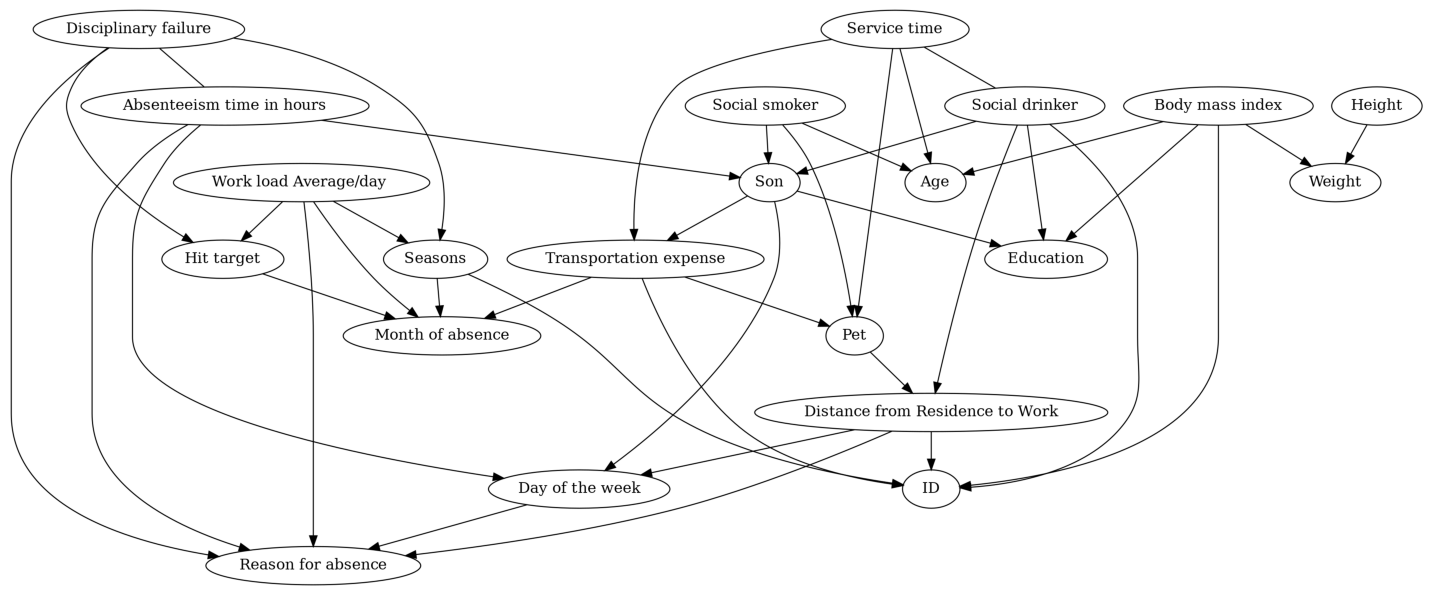

In [73]:
churn_dataset(df,pValue=0.05)

In [14]:
amphi = pd.read_csv("amphibiens.csv",delimiter=";")

In [15]:
to_remove = ["ID", "Motorway"]
amp = amphi.drop(to_remove, axis=1).dropna().to_numpy()

In [16]:
amp

array([[600,   1,   1, ...,   0,   0,   0],
       [700,   1,   5, ...,   0,   1,   0],
       [200,   1,   5, ...,   0,   1,   0],
       ...,
       [500,   1,   1, ...,   0,   1,   0],
       [300,   1,  12, ...,   0,   0,   0],
       [300,   1,  12, ...,   0,   0,   0]])

In [17]:
var_names = [x for x in list(amphi.columns) if not x in to_remove]

In [29]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci

cg = pc(amp,node_names=var_names)

#cg.draw_pydot_graph()
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

Depth=3, working on node 20: 100%|█████████████| 21/21 [00:00<00:00, 738.06it/s]


In [33]:
var_names

['SR',
 'NR',
 'TR',
 'VR',
 'SUR1',
 'SUR2',
 'SUR3',
 'UR',
 'FR',
 'OR',
 'RR',
 'BR',
 'MR',
 'CR',
 'Green frogs',
 'Brown frogs',
 'Common toad',
 'Fire-bellied toad',
 'Tree frog',
 'Common newt',
 'Great crested newt']

In [34]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.FCI import fci

G, edges = fci(amp,node_names=var_names)

#.draw_pydot_graph()
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(G,edges,labels=var_names)
pyd.write_png('simple_test2.png')


Depth=3, working on node 20: 100%|█████████████| 21/21 [00:00<00:00, 597.71it/s]


X9 --> X8
X19 --> X17
X18 --> X19
X20 --> X18
X19 --> X21
X21 --> X20


In [51]:
ba2.head()

,university,overall,support 1,support2,exams,support3,students,ma_time,ba_time
0,RWTH Aachen,1.6,0.857143,1.9,1.8,1.8,2010,54.4,78.5
1,Uni Bamberg,1.7,0.785714,1.9,2.0,1.8,2230,61.2,90.2
2,FU Berlin,2.3,0.785714,2.4,2.2,2.1,1530,67.5,82.0
3,HU Berlin,NaN,0.714286,2.2,2.1,2.3,1270,46.0,66.4
4,TU Berlin,NaN,NaN,NaN,NaN,NaN,520,91.3,84.8


In [68]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'dowhy'

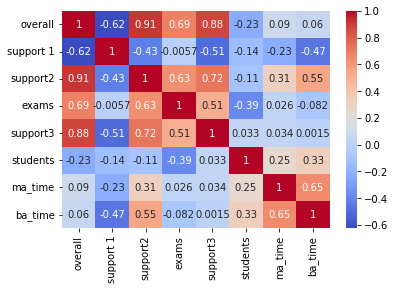

In [66]:
sns.heatmap(ba2.corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.show()